<a href="https://colab.research.google.com/github/sharibhumayun/Logic2.0/blob/main/TRIM_prediction_Base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [3]:
path = 'https://raw.githubusercontent.com/sharibhumayun/Logic2.0/main/Scorev2.csv'

df = pd.read_csv(path)
df.head()

,Months,TRIM,Communication,Proposition,Sales Experience,Opt in/out & renew,Network,Customer Support,Billing & Payment
0,Jan'19,85,45.151,49.391,58.760,51.650,49.373,56.720,56.070
1,Feb'19,86,45.212,49.318,57.340,52.710,49.700,59.621,55.311
2,Mar'19,86,44.376,48.466,57.830,52.140,50.508,60.862,53.310
3,April'19,85,44.132,49.230,57.011,50.480,48.870,60.970,52.070
4,May'19,85,43.400,49.150,55.260,50.729,49.292,62.506,50.820


In [4]:
df = df.drop('Months', axis = 1)
df.head()

,TRIM,Communication,Proposition,Sales Experience,Opt in/out & renew,Network,Customer Support,Billing & Payment
0,85,45.151,49.391,58.760,51.650,49.373,56.720,56.070
1,86,45.212,49.318,57.340,52.710,49.700,59.621,55.311
2,86,44.376,48.466,57.830,52.140,50.508,60.862,53.310
3,85,44.132,49.230,57.011,50.480,48.870,60.970,52.070
4,85,43.400,49.150,55.260,50.729,49.292,62.506,50.820


In [5]:
x= df.drop('TRIM', axis=1)
y= df['TRIM']

In [6]:
x.columns



Index(['Communication ', 'Proposition', 'Sales Experience',
       'Opt in/out & renew', 'Network', 'Customer Support',
       'Billing & Payment'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

In [8]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [9]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
lr.score(x_test,y_test)

0.9806080391494914

In [11]:
y_pred= lr.predict(x_test)
y_pred

array([89.72515116, 90.1906308 , 85.46210145, 90.65141738, 90.75597305,
       85.83738335, 91.0303927 , 89.90794007])

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
mse= mean_squared_error(y_pred,y_test)
print(mse)

0.07726484401374534


In [13]:
from sklearn import metrics
np.round(metrics.r2_score(y_pred, y_test),2)

0.98

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


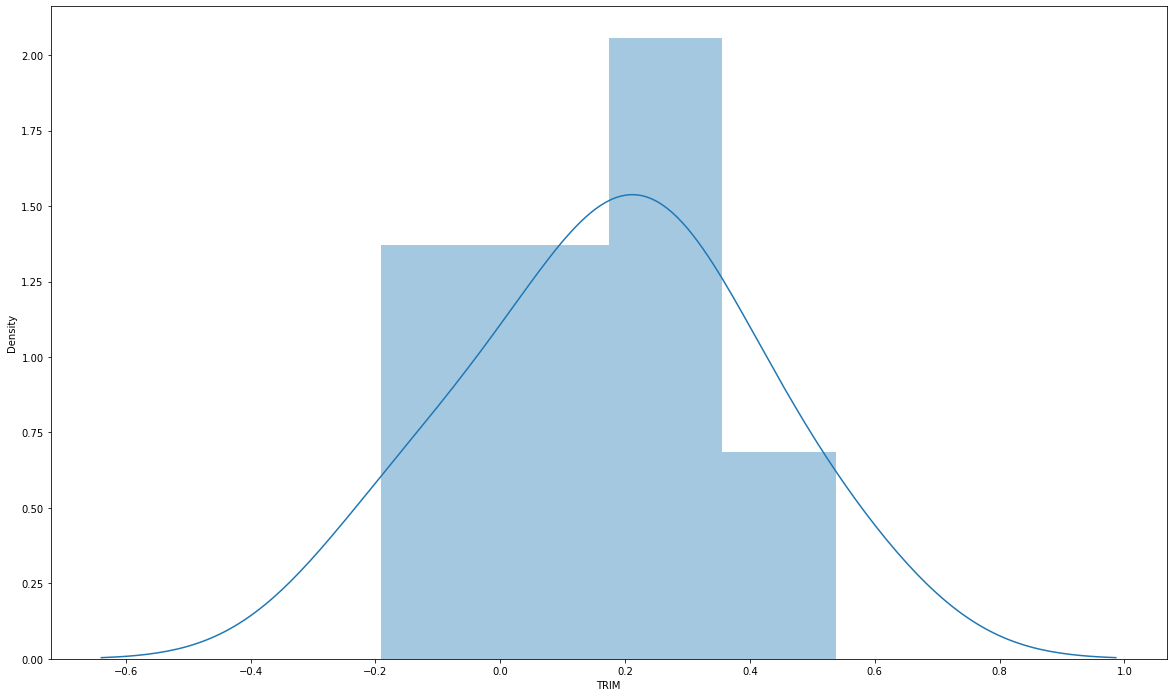

In [14]:
import seaborn as sns
plt.figure(figsize=(20,12))
sns.distplot(y_test - y_pred)

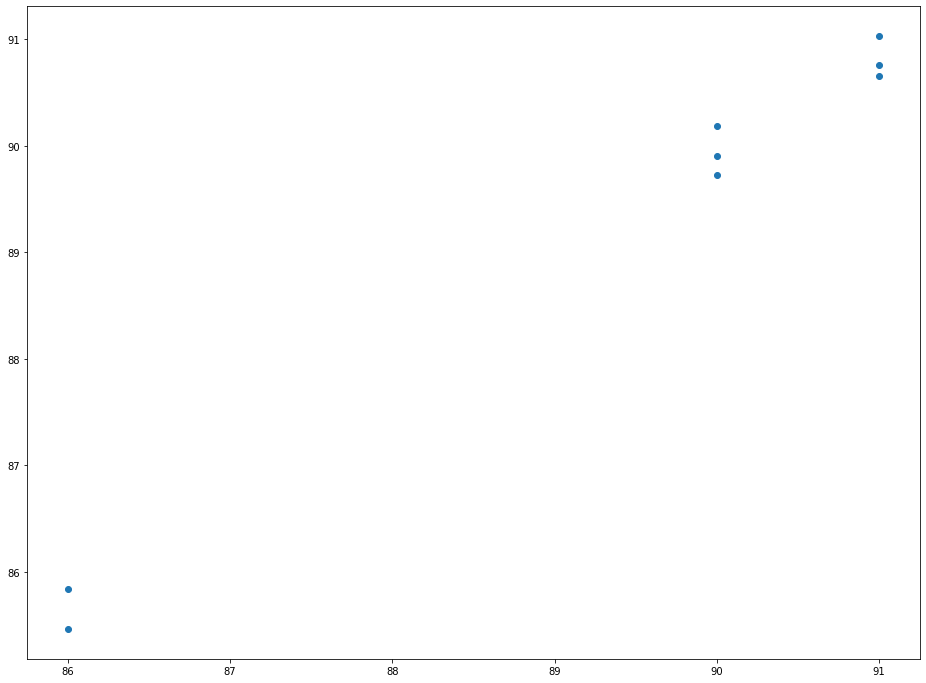

In [15]:
plt.figure(figsize=(16,12))
plt.scatter(y_test, y_pred)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


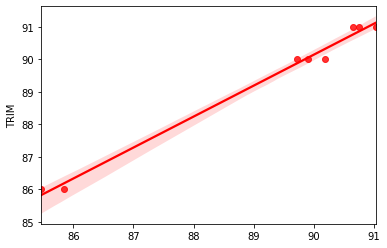

In [16]:
sns.regplot(y_pred,y_test, data = df, color='r')

In [17]:
lr.coef_

array([0.10781486, 0.32345213, 0.02825905, 0.06950679, 0.39409538,
       0.07839909, 0.08589301])

In [18]:
lr.intercept_

30.487522215861325

Text(0, 0.5, 'TRIM')

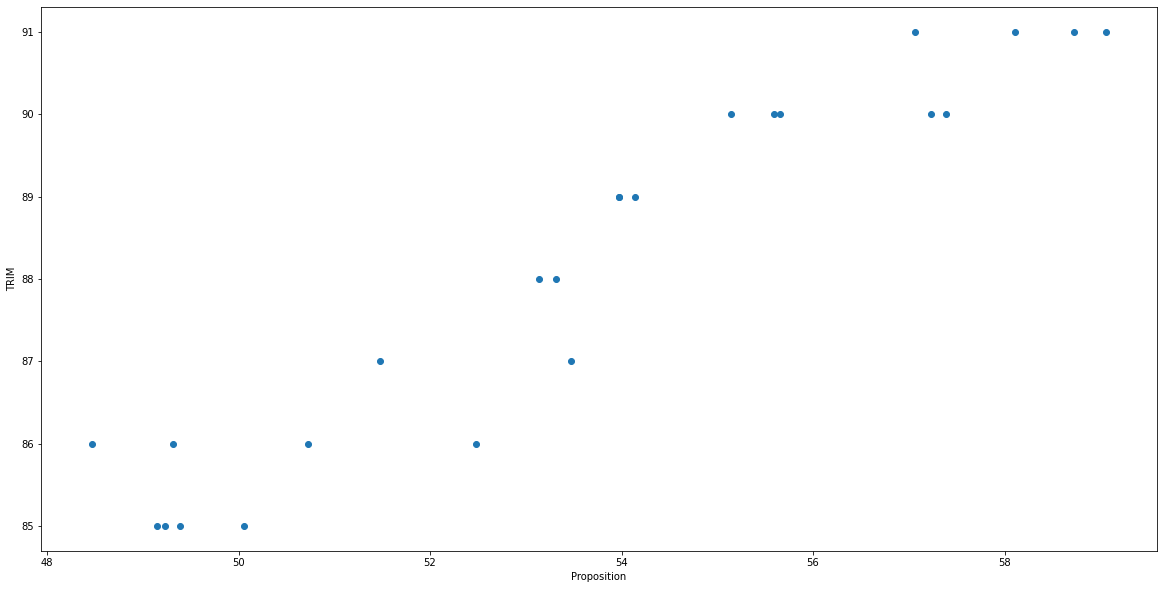

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(x=df['Proposition'], y= df['TRIM'])
plt.xlabel('Proposition')
plt.ylabel('TRIM')

In [20]:
import seaborn as sns

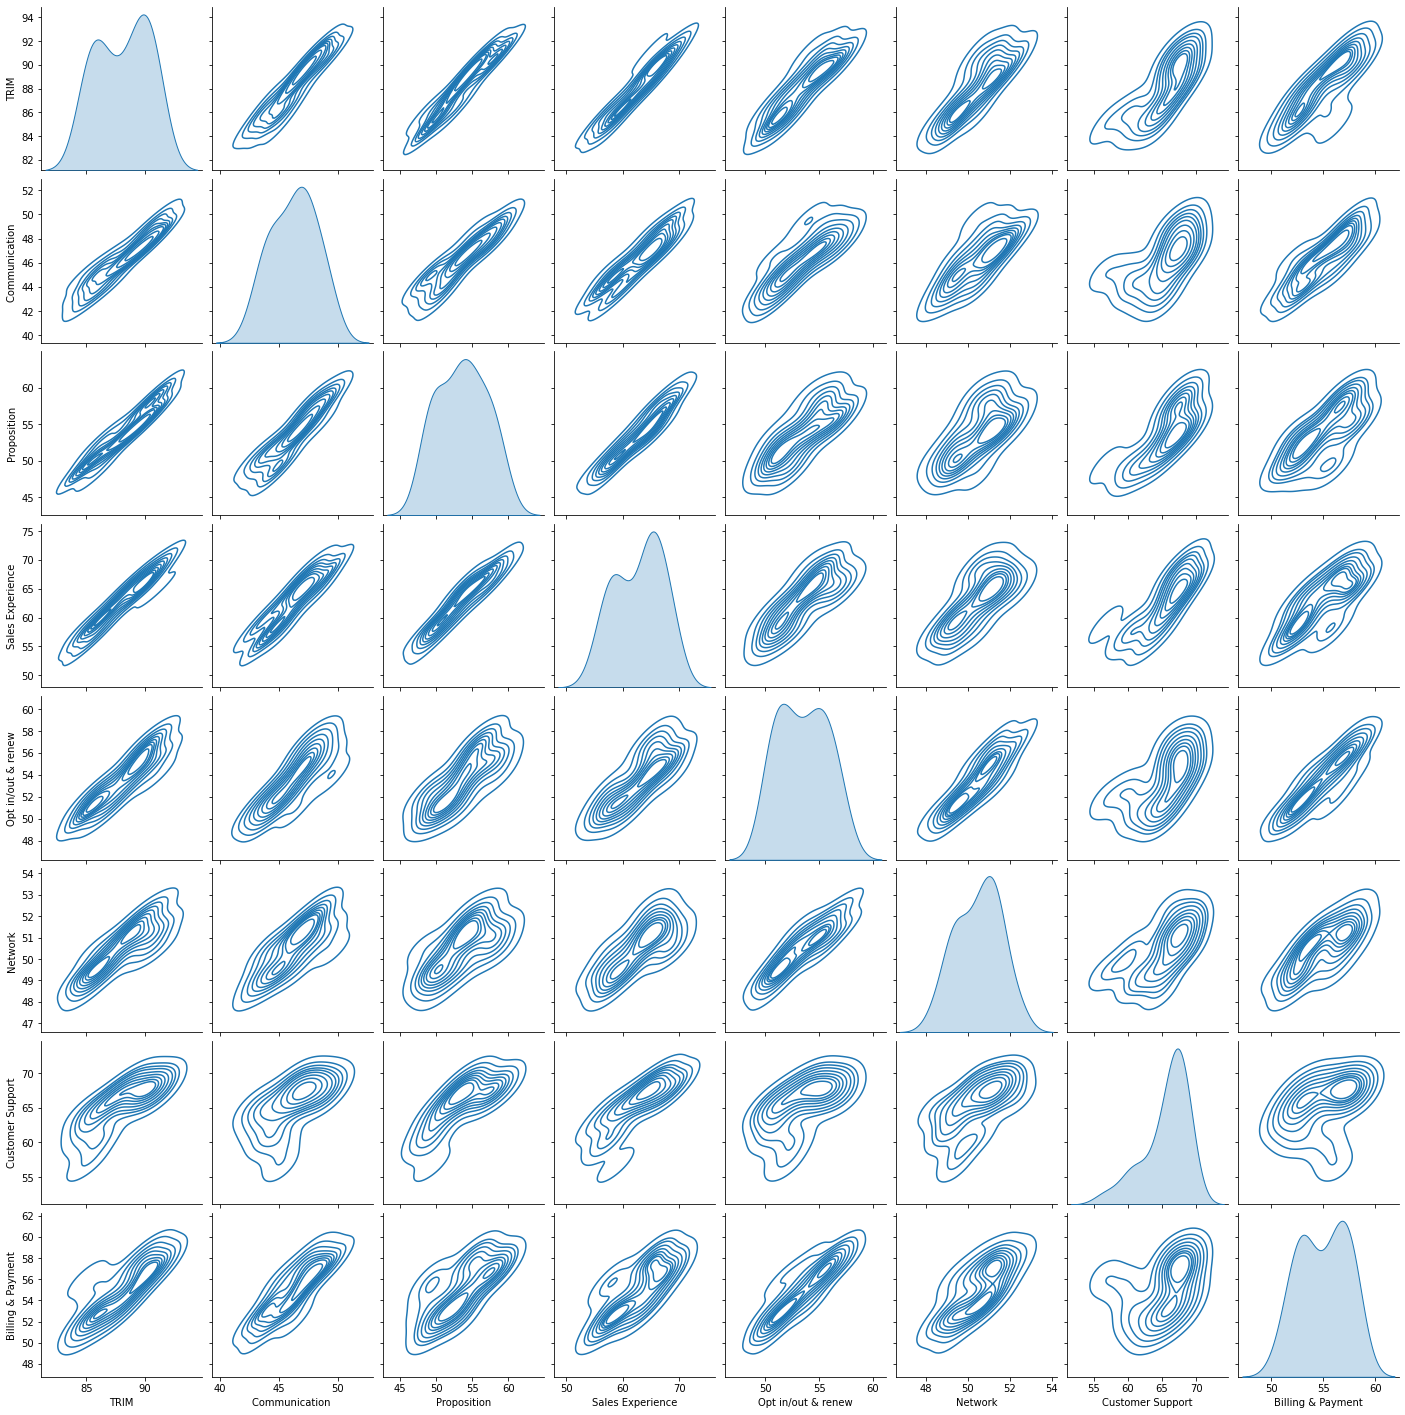

In [21]:
sns.pairplot(df, kind = 'kde')